In [3]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
#### Task:
##### 1.fitting it to the periodic function
##### 2.plot the fit

#### Data
##### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
##### Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [4]:
maxTemp = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
minTemp = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
months = np.arange(12)

In [5]:
def yearlyTemps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearlyTemps, months,maxTemp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearlyTemps, months,minTemp, [-40, 20, 0])

In [6]:
res_max

array([ 39.88861734, -10.59083168,   1.33370154])

In [7]:
res_min

array([25.55626462, -7.74472963,  0.93101294])

In [8]:
cov_max

array([[ 1.28972691, -0.14357417, -0.02263923],
       [-0.14357417,  2.57009605, -0.032763  ],
       [-0.02263923, -0.032763  ,  0.07074015]])

In [9]:
cov_min

array([[ 0.19941393, -0.02644226, -0.00351662],
       [-0.02644226,  0.38392583, -0.00606194],
       [-0.00351662, -0.00606194,  0.02114122]])

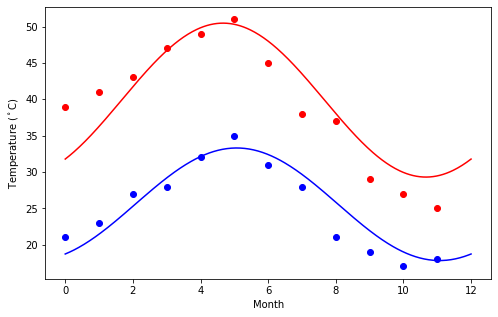

In [10]:
days = np.linspace(0, 12, num=365)
plt.figure(figsize=(8,5))
plt.plot(months, maxTemp, 'ro')
plt.plot(days, yearlyTemps(days, *res_max), 'r-')
plt.plot(months, minTemp, 'bo')
plt.plot(days, yearlyTemps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [31]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic=pd.read_csv(url)

In [32]:
titanic.drop([1309],axis=0,inplace=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [33]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


#### 1. Create a pie chart presenting the male/female proportion

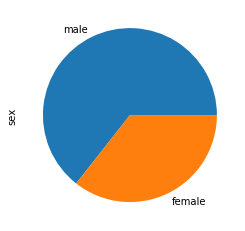

In [34]:
titanic['sex'].value_counts().plot.pie()

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

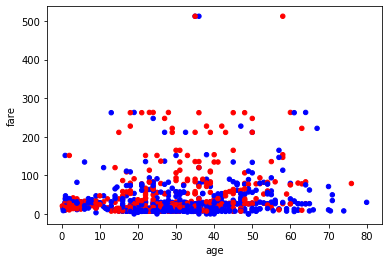

In [35]:
colors={'male':'blue','female':'red'}
scatter=titanic.plot.scatter(x='age',y='fare',c=titanic['sex'].apply(lambda x: colors[x]))

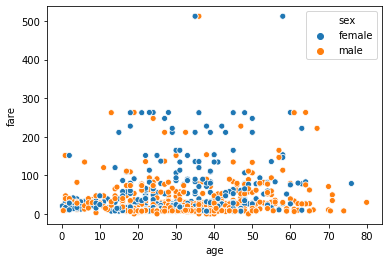

In [36]:
import seaborn as sns
sns.scatterplot(x=titanic['age'],y=titanic['fare'],hue=titanic['sex'])